In [117]:
# library
import math
import nltk
import random
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.utils import resample
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
pip install nltk

In [45]:
# load cleaned data
data = pd.read_pickle("D:/Northeastern/Northeastern_CS6220/Final/cleaned.pkl")

In [46]:
data

,company_profile,description,requirements,benefits,fraudulent
0,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management systems major pl...,experience content management systems major pl...,0
1,90 seconds worlds cloud video production servi...,organised focused vibrant awesomedo passion cu...,expect key responsibility communicate client 9...,expect key responsibility communicate client 9...,0
2,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,implement precommissioning commissioning proce...,0
3,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,education bachelors masters gis business admin...,0
4,spot source solutions llc global human capital...,job title itemization review manager location ...,qualifications rn license state texas diploma ...,qualifications rn license state texas diploma ...,0
...,...,...,...,...,...
17875,vend looking awesome new talent come join us y...,case first time youve visited website vend awa...,ace role eat comprehensive statements work bre...,ace role eat comprehensive statements work bre...,0
17876,web linc ecommerce platform services provider ...,payroll accountant focus primarily payroll fun...,ba bs accounting desire fun love genuine passi...,ba bs accounting desire fun love genuine passi...,0
17877,provide full time permanent positions many med...,experienced project cost control staff enginee...,least 12 years professional experienceability ...,least 12 years professional experienceability ...,0
17878,na,nemsia studios looking experienced visualgraph...,1 must fluent latest versions corel amp adobe ...,1 must fluent latest versions corel amp adobe ...,0


In [47]:
labelcountlist = []
for x in data.columns:
        labelcountlist.append((len(data[x].unique())))
labelcount = pd.DataFrame({'Attribute': data.columns, 'Count': labelcountlist})
print(labelcount)

         Attribute  Count
0  company_profile   1708
1      description  14463
2     requirements  11748
3         benefits  11748
4       fraudulent      2


In [93]:
#STORING ALL THOSE ATTRIBUTES WITH LESS THAN 100 LABELS
#AlSO DISPLAYS THE COUNT OF EVERY LABEL IN EACH ATTRIBUTE
print(labelcount[labelcount['Count'] < 100])
count = 0
label = []
for x in data.columns:
    if len(data[x].unique()) < 100:
        print('\n' + x + '\n----------\n' + str(list(data[x].unique())) + "\n")
        print(data[x].value_counts())
        label.append(x)

    Attribute  Count
4  fraudulent      2

fraudulent
----------
[0, 1]

0    17014
1      865
Name: fraudulent, dtype: int64


In [49]:
data["full_text"] = data["company_profile"] + " " + data["description"] + " " + data["requirements"] + " " + data["benefits"]

In [50]:
null_all = data.isnull().sum()
print(null_all)

company_profile    0
description        0
requirements       0
benefits           0
fraudulent         0
full_text          0
dtype: int64


In [113]:
#define the variables
x = data['description']
y = data['fraudulent']

#split it into training and test sets
x_train_unprocessed, x_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(x, y, test_size=0.2, random_state = 1)

#vectorization
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train_unprocessed)

x_trainvec = vectorizer.transform(x_train_unprocessed)
x_testvec = vectorizer.transform(x_test_unprocessed)
randomforest = RandomForestClassifier()
randomforest.fit(x_trainvec, y_train_unprocessed)
y_pred_unprocessed = randomforest.predict(x_testvec).flatten()
y_unprocessed =randomforest.predict(x_trainvec).flatten()

In [59]:
#Calculating the accuracy
accuracy = metrics.accuracy_score(y_pred_unprocessed, y_test_unprocessed)
print("Accuracy = " + '{:.2f}%'.format(accuracy*100))

Accuracy = 98.27%


In [70]:
train_x = df_upsampled['full_text']
test_x = test['full_text']

train_y = df_upsampled['fraudulent']
test_y = test['fraudulent']

vectorizer = TfidfVectorizer()

train_data = vectorizer.fit_transform(train_x)
test_data = vectorizer.transform(test_x)

In [71]:
randomforest.fit(train_data, train_y)

RandomForestClassifier()

In [77]:
y_test = test_y.values.flatten()

y_pred = randomforest.predict(test_data).flatten()

In [115]:
acc = metrics.accuracy_score(y_unprocessed,y_train_unprocessed)
print("Accuracy = " + '{:.2f}%'.format(acc*100))

Accuracy = 99.99%


In [78]:
#Calculating the accuracy
accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy = " + '{:.2f}%'.format(accuracy*100))

Accuracy = 98.21%


In [120]:
precision = metrics.precision_score(y_pred, y_test)
print("precision = " + '{:.2f}%'.format(accuracy*100))

precision = 98.21%


In [85]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred.ravel())
auc = metrics.roc_auc_score(y_test, y_pred, average='macro')
roc_auc = metrics.auc(fpr, tpr)
print ("AUC = " + '{:.2f}%'.format(auc*100))
print ("ROC_AUC = " + '{:.2f}%'.format(roc_auc*100))

AUC = 83.87%
ROC_AUC = 83.87%


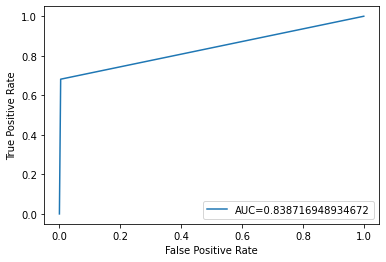

In [87]:
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# From the figure, it demonstrates that the value of AUC equals to 0.84, 
# which demonstrates the good fitting of the chosen model.